Netoyage de la 2eme jeu de donnée

In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "Data2_Palworld_Data-hide pallu attributes.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows to analyze the data
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Chinese name                       177 non-null    object 
 1   code name                          177 non-null    object 
 2   OverrideNameTextID                 160 non-null    object 
 3   NamePrefixID                       160 non-null    object 
 4   OverridePartnerSkillTextID         160 non-null    object 
 5   IsPal                              177 non-null    bool   
 6   Tribe                              177 non-null    object 
 7   BPClass                            177 non-null    object 
 8   Pictorial ID                       177 non-null    int64  
 9   ZukanIndexSuffix                   0 non-null      float64
 10  Size                               177 non-null    object 
 11  rarity                             177 non-null    int64  

(None,
                      Chinese name             code name    OverrideNameTextID  \
 0  Victor & Heterogeneous Griffin      GYM_BlackGriffon     PAL_NAME_SnowBoss   
 1            Zoe & Lightning Bear         GYM_ElecPanda    PAL_NAME_GrassBoss   
 2                  Marcus & Horus             GYM_Horus  PAL_NAME_DessertBoss   
 3               Lily & Lily Queen         GYM_LilyQueen   PAL_NAME_ForestBoss   
 4                   Axel & Pollux  GYM_ThunderDragonMan  PAL_NAME_VolcanoBoss   
 
        NamePrefixID    OverridePartnerSkillTextID  IsPal  \
 0     GYM_NAME_Snow      PARTNERSKILL_lackGriffon   True   
 1   GYM_NAME_Meadow         PARTNERSKILL_lecPanda   True   
 2   GYM_NAME_Desert             PARTNERSKILL_orus   True   
 3   GYM_NAME_Forest         PARTNERSKILL_ilyQueen   True   
 4  GYM_NAME_Volcano  PARTNERSKILL_hunderDragonMan   True   
 
                            Tribe               BPClass  Pictorial ID  \
 0      EPalTribeID::BlackGriffon      GYM_BlackGriffon   

In [2]:
# Étape 1 : Supprimer la colonne vide
df_cleaned = df.drop(columns=["ZukanIndexSuffix"])

# Étape 2 : Supprimer les doublons basés sur "code name"
df_cleaned = df_cleaned.drop_duplicates(subset="code name")

# Étape 3 : Remplacer les "None" et chaînes vides par NaN
df_cleaned = df_cleaned.replace(["None", ""], pd.NA)

# Vérifier les résultats
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 70 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Chinese name                       177 non-null    object 
 1   code name                          177 non-null    object 
 2   OverrideNameTextID                 160 non-null    object 
 3   NamePrefixID                       160 non-null    object 
 4   OverridePartnerSkillTextID         160 non-null    object 
 5   IsPal                              177 non-null    bool   
 6   Tribe                              177 non-null    object 
 7   BPClass                            177 non-null    object 
 8   Pictorial ID                       177 non-null    int64  
 9   Size                               177 non-null    object 
 10  rarity                             177 non-null    int64  
 11  Element 1                          177 non-null    object 

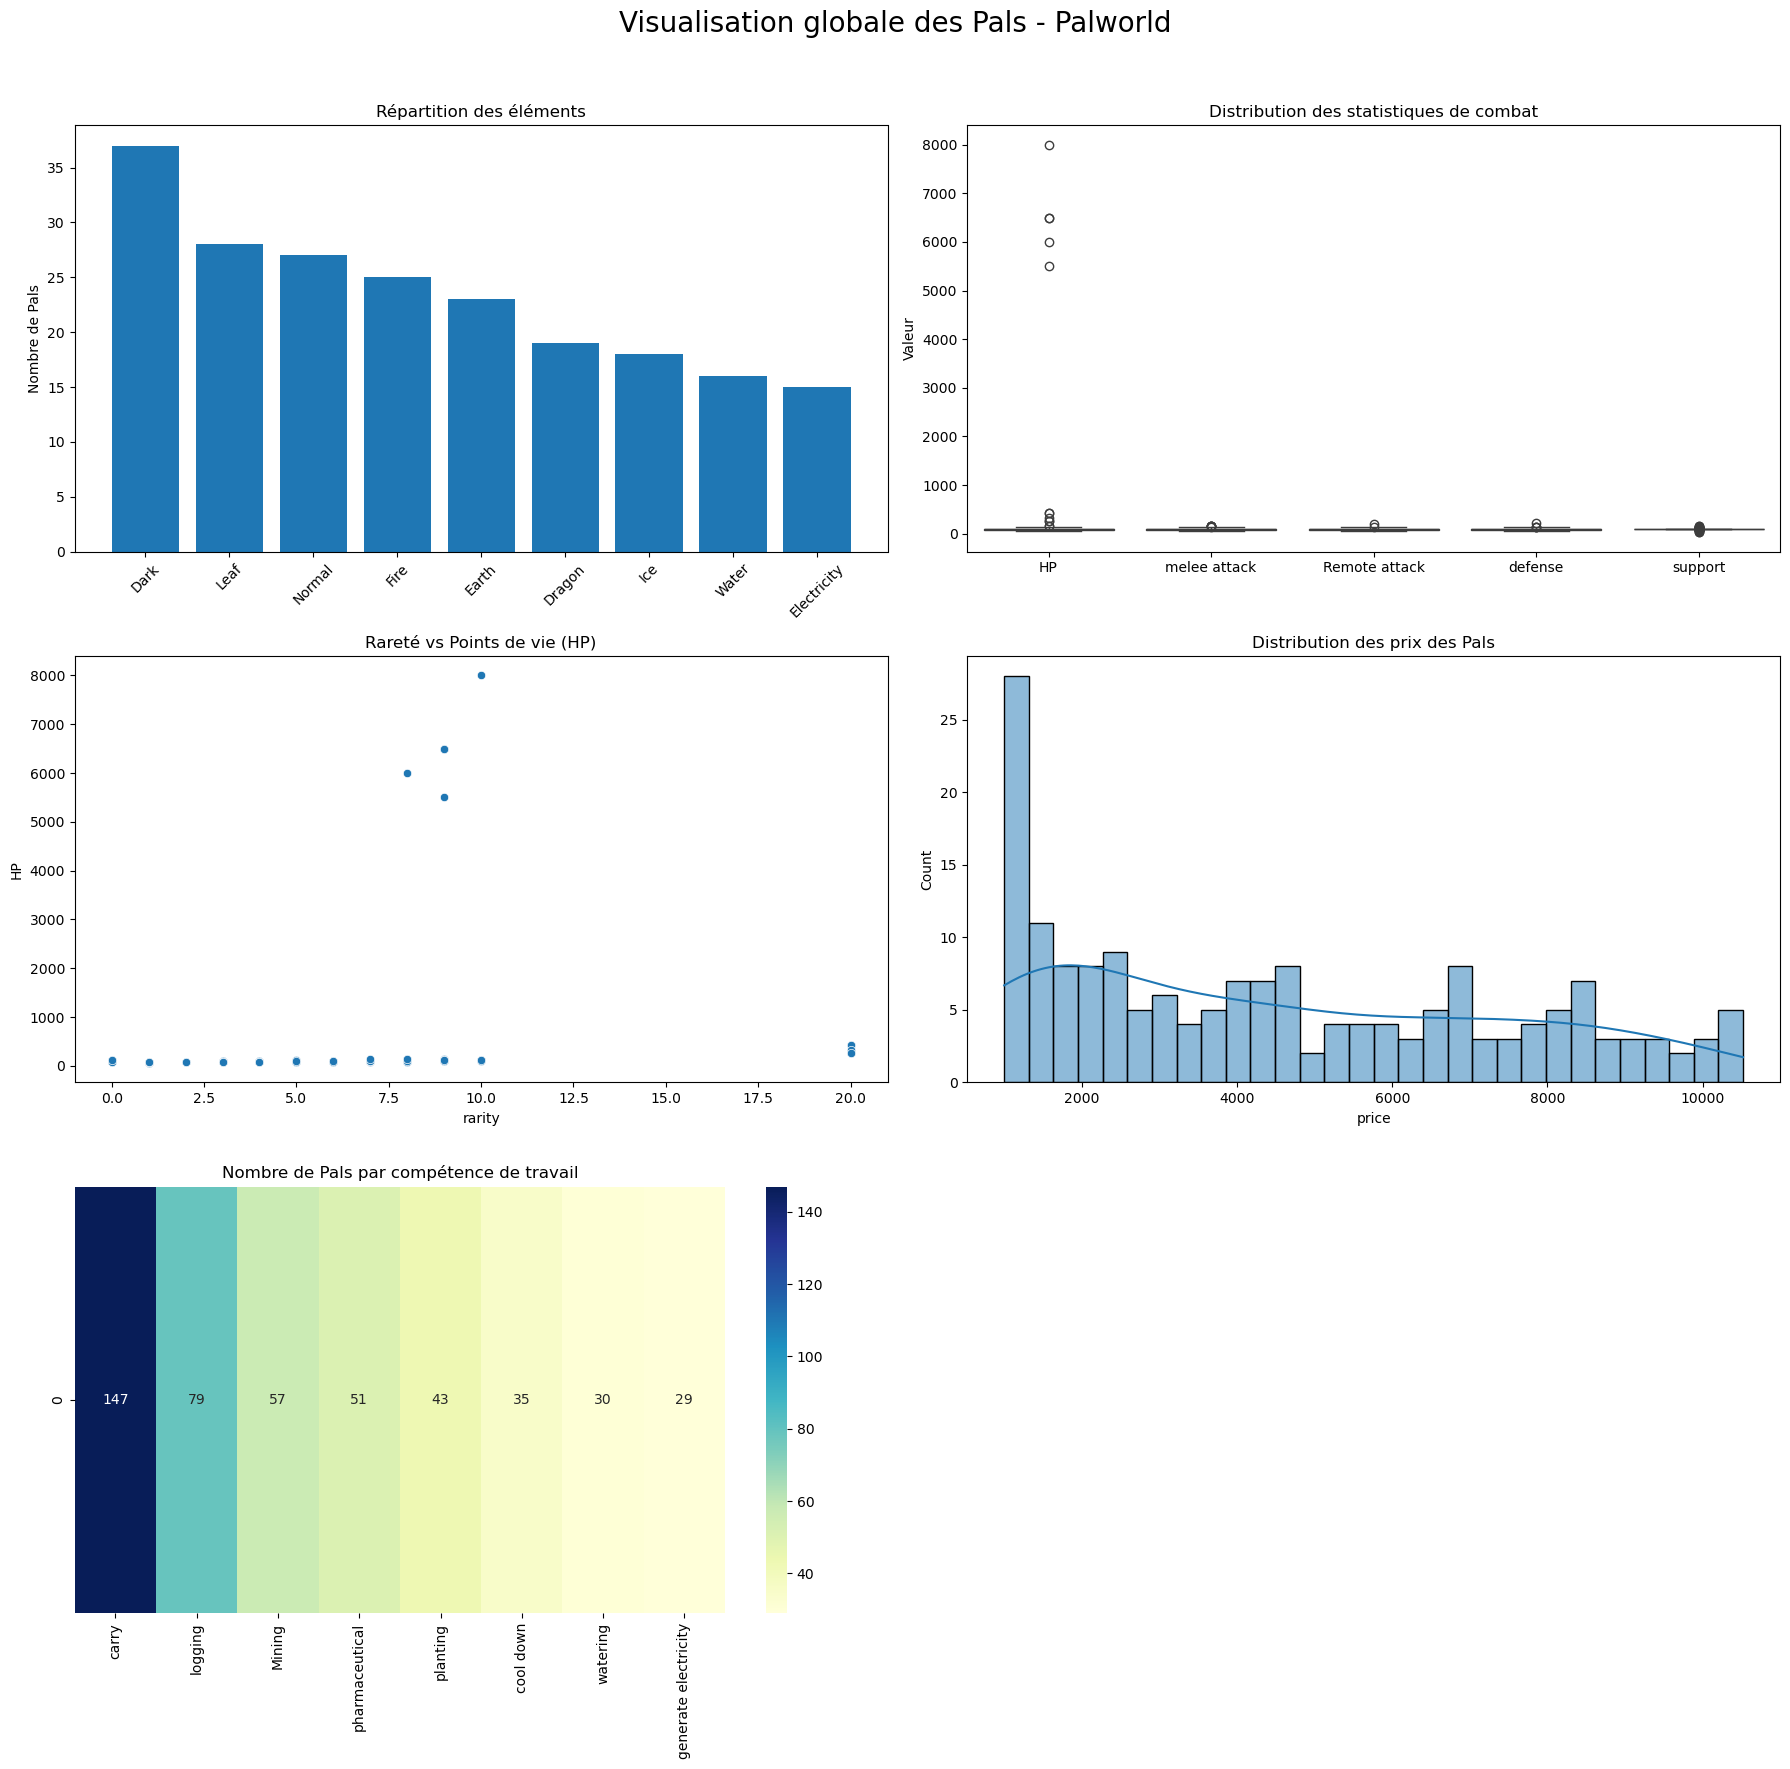

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mise à jour des noms de colonnes avec la casse correcte
skills = [
    "planting",
    "watering",
    "generate electricity",
    "Mining",  # ================= majuscule corrigée ==============
    "logging",
    "pharmaceutical",
    "cool down",
    "carry"
]

# Reconstruire la figure
fig, axs = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle("Visualisation globale des Pals - Palworld", fontsize=20)

# 1. Répartition des éléments
element_counts = pd.concat([df_cleaned["Element 1"], df_cleaned["Element 2"]]).value_counts().dropna()
axs[0, 0].bar(element_counts.index, element_counts.values)
axs[0, 0].set_title("Répartition des éléments")
axs[0, 0].set_ylabel("Nombre de Pals")
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Distribution des statistiques de combat (boxplot)
combat_data = df_cleaned[["HP", "melee attack", "Remote attack", "defense", "support"]]
sns.boxplot(data=combat_data, ax=axs[0, 1])
axs[0, 1].set_title("Distribution des statistiques de combat")
axs[0, 1].set_ylabel("Valeur")

# 3. Corrélation rareté vs HP
sns.scatterplot(data=df_cleaned, x="rarity", y="HP", ax=axs[1, 0])
axs[1, 0].set_title("Rareté vs Points de vie (HP)")

# 4. Distribution des prix
sns.histplot(data=df_cleaned, x="price", bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Distribution des prix des Pals")

# 5. Heatmap des compétences de travail
skill_data = df_cleaned[skills].fillna(0).astype(int)
skill_summary = skill_data.sum().sort_values(ascending=False)
sns.heatmap(skill_summary.to_frame().T, annot=True, fmt='d', cmap="YlGnBu", ax=axs[2, 0])
axs[2, 0].set_title("Nombre de Pals par compétence de travail")
axs[2, 1].axis("off")  # dernière case vide

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
